In [16]:
import time
import numpy as np
from GACF import find_correlation_from_lists

In [14]:
n_points = 10

In [8]:
num_data_points = np.logspace(1, 5, n_points, base=10)

In [9]:
num_data_points = [int(n) for n in num_data_points]

In [10]:
num_data_points

[10, 27, 77, 215, 599, 1668, 4641, 12915, 35938, 100000]

In [11]:
num_lag_points = num_data_points

In [15]:
timings = np.zeros((n_points, n_points))

In [18]:
for i, N in enumerate(num_data_points):
    for j, M in enumerate(num_lag_points):
        time_series = np.linspace(0, 100, N)
        data = np.sin(time_series)
        max_lag = time_series[-1]
        lag_resolution = float(max_lag) / float(M)
        t_start = time.clock()
        _,_ = find_correlation_from_lists(time_series, data, lag_resolution=lag_resolution, max_lag=max_lag)
        t_end = time.clock()
        run_time = t_end - t_start
        timings[i, j] = run_time

Calculating correlations: 100%|██████████| 11/11.0 [00:00<00:00, 5107.08it/s]
Calculating correlations:  96%|█████████▋| 27/28.0 [00:00<00:00, 6891.39it/s]
Calculating correlations:  99%|█████████▊| 77/78.0 [00:00<00:00, 11236.18it/s]
Calculating correlations: 100%|██████████| 216/216.0 [00:00<00:00, 18848.45it/s]
Calculating correlations: 100%|██████████| 600/600.0 [00:00<00:00, 15769.94it/s]
Calculating correlations: 100%|██████████| 1669/1669.0 [00:00<00:00, 26372.31it/s]
Calculating correlations: 100%|██████████| 4642/4642.0 [00:00<00:00, 34554.90it/s]
Calculating correlations: 100%|█████████▉| 12915/12916.0 [00:00<00:00, 38199.97it/s]
Calculating correlations: 100%|██████████| 35939/35939.0 [00:00<00:00, 45297.97it/s]
Calculating correlations: 100%|█████████▉| 100000/100001.0 [00:02<00:00, 47266.80it/s]
Calculating correlations: 100%|██████████| 11/11.0 [00:00<00:00, 4170.04it/s]
Calculating correlations:  96%|█████████▋| 27/28.0 [00:00<00:00, 7278.03it/s]
Calculating correlations

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext

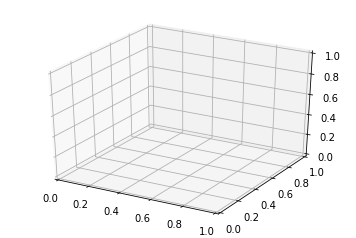

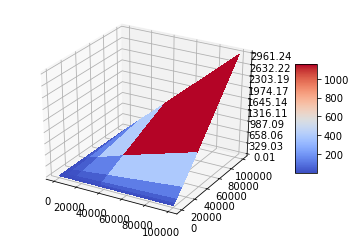

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = num_data_points
Y = num_lag_points
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)
Z = timings

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

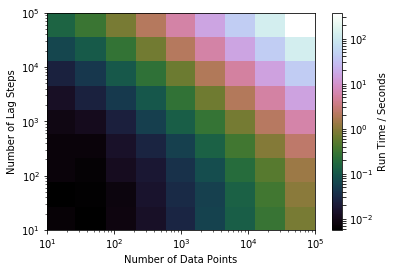

In [59]:
X,Y = np.meshgrid(num_data_points, num_lag_points)
Z = timings
im = plt.pcolor(X,Y,Z, cmap='cubehelix', norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Data Points')
plt.ylabel('Number of Lag Steps')

plt.colorbar(im, orientation='vertical',format=LogFormatterMathtext(), label='Run Time / Seconds')
plt.savefig('G-ACF_run_timings.pdf')
plt.show()


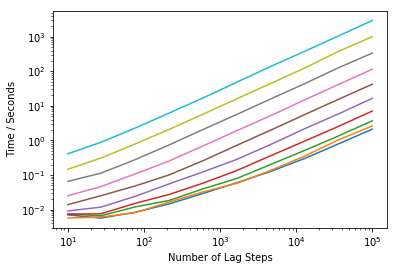

In [43]:
fig, ax = plt.subplots()
for i in range(len(timings)):
    ax.plot(num_lag_points,timings[i], label=str(num_data_points[i])+" data points")
ax.set_ylabel("Time / Seconds")
ax.set_xlabel("Number of Lag Steps")
# ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

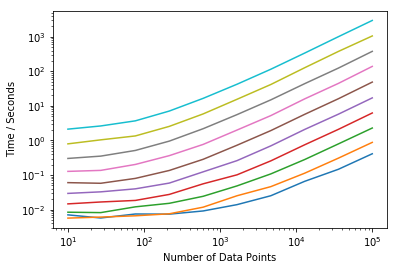

In [44]:
fig, ax = plt.subplots()
for i in range(len(timings)):
    ax.plot(num_data_points,timings[:,i], label=str(num_lag_points[i])+" lag steps")
ax.set_ylabel("Time / Seconds")
ax.set_xlabel("Number of Data Points")
# ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [45]:
import os
os.getcwd()

'/Users/joshbriegal/GitHub/GACF/example'

In [46]:
import pickle

In [47]:
with open('run_timings.pkl', 'w') as pkl:
    dic = {"lag_steps": num_lag_points, "data_steps": num_data_points, "timings": timings}
    pickle.dump(dic, pkl)

In [48]:
os.listdir(os.getcwd())

['.DS_Store',
 '.ipynb_checkpoints',
 '__init__.py',
 'already_processed.txt',
 'autocorrelation.pdf',
 'create_field_from_object_files.py',
 'files',
 'G-ACF Runtime testing.ipynb',
 'GACF_utils',
 'GP_regression_test.py',
 'increasing_fourier_transform_test.py',
 'JamesJackmanWork',
 'misc',
 'NG0522-2518_031001_LC_tbin=10min.dat',
 'NG2331-3922',
 'NGTS_Field.py',
 'NGTS_Field.pyc',
 'NGTS_Field_Histogram.ipynb',
 'NGTS_Field_Histogram.py',
 'NGTS_GACF_tests.py',
 'NGTS_Object.py',
 'NGTS_Object.pyc',
 'Object_comparison.ipynb',
 'objects_test_from_file.py',
 'peaks.log',
 'period_detections.pkl',
 'Periods_plot.ipynb',
 'phase_fold_1.64646_days.pdf',
 'phase_fold_2.55389652614_days.pdf',
 'polynomial_fit.py',
 'processed',
 'report_plots',
 'RichardWork',
 'run_timings.pkl',
 'scp_temp.pkl',
 'sine_wave_noise_effects.py',
 'single_period_sine_wave.py',
 'Sp1003-0105_5global.csv',
 'Sp1003-0105_6globalbinned.csv',
 'temp',
 'test',
 'Untitled.ipynb',
 'Vedad',
 'Vedad_GACF_compariso

In [50]:
with open('run_timings.pkl', 'r') as f:
    timmy = pickle.load(f)

In [51]:
timmy

{'data_steps': [10, 27, 77, 215, 599, 1668, 4641, 12915, 35938, 100000],
 'lag_steps': [10, 27, 77, 215, 599, 1668, 4641, 12915, 35938, 100000],
 'timings': array([[7.06000000e-03, 5.68500000e-03, 8.42300000e-03, 1.46710000e-02,
         2.94720000e-02, 6.03690000e-02, 1.27725000e-01, 3.02374000e-01,
         7.98533000e-01, 2.12761300e+00],
        [5.73300000e-03, 6.09200000e-03, 8.20300000e-03, 1.66480000e-02,
         3.26920000e-02, 5.78530000e-02, 1.36470000e-01, 3.53022000e-01,
         1.04288300e+00, 2.63073000e+00],
        [7.48000000e-03, 6.63300000e-03, 1.20480000e-02, 1.84600000e-02,
         3.99450000e-02, 8.00740000e-02, 2.02697000e-01, 5.14961000e-01,
         1.35333700e+00, 3.69852200e+00],
        [7.40900000e-03, 7.57900000e-03, 1.52400000e-02, 2.75520000e-02,
         5.86230000e-02, 1.35794000e-01, 3.64206000e-01, 9.58822000e-01,
         2.55778500e+00, 7.09791700e+00],
        [9.16000000e-03, 1.17830000e-02, 2.43120000e-02, 5.58240000e-02,
         1.23932000

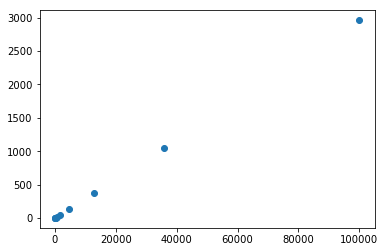

In [54]:
plt.scatter(num_lag_points, timings[9])
plt.show()